# Creating color RGB images using the Lupton et al (2004) scheme

Lupton et al. (2004) describe an “optimal” algorithm for producing red-green- blue composite images from three separate high-dynamic range arrays. This method is implemented in **make_lupton_rgb** as a convenience wrapper function and an associated set of classes to provide alternate scalings. The SDSS SkyServer color images were made using a variation on this technique. To generate a color PNG file with the default (arcsinh) scaling:

In [1]:
import matplotlib.pyplot as plt
from astropy.visualization import make_lupton_rgb
from astropy.io import fits
from astropy.utils.data import get_pkg_data_filename
from astropy.wcs import WCS


This method requires that the three images be aligned and have the same pixel scale and size. Changing minimum will change the black level, while stretch and Q will change how the values between black and white are scaled.

For a more in-depth example, download the g, r, i SDSS frames (they will serve as the blue, green and red channels respectively) of the area around the Hickson 88 group and try the example below and compare it with Figure 1 of Lupton et al. (2004):

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


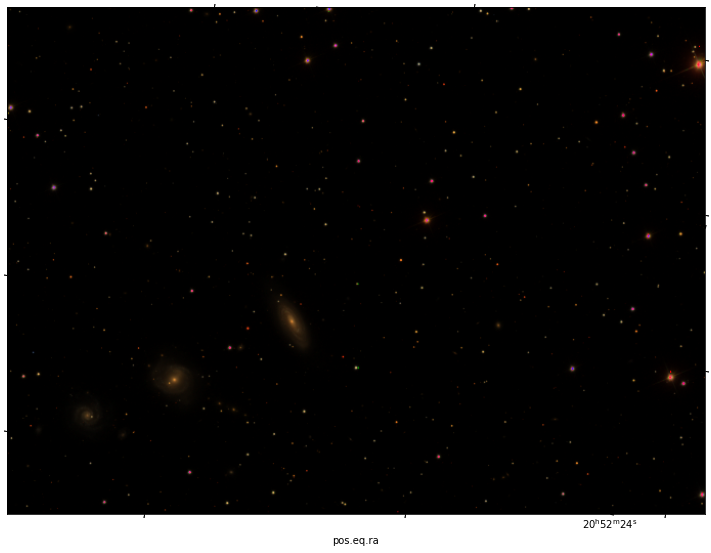

In [2]:
# Read in the three images downloaded from here:
g_name = get_pkg_data_filename('visualization/reprojected_sdss_g.fits.bz2')
r_name = get_pkg_data_filename('visualization/reprojected_sdss_r.fits.bz2')
i_name = get_pkg_data_filename('visualization/reprojected_sdss_i.fits.bz2')
g = fits.open(g_name)[0].data
wcs1 = WCS(fits.open(g_name)[0].header)

r = fits.open(r_name)[0].data
i = fits.open(i_name)[0].data
plt.subplot(projection=wcs1) 

rgb_default = make_lupton_rgb(i, r, g, filename="ngc6976-default.jpeg")
plt.imshow(rgb_default, origin='lower')



fig = plt.gcf()
fig.set_size_inches(12.5, 12.5)


The image above was generated with the default parameters. However using a different scaling, e.g Q=10, stretch=0.5, faint features of the galaxies show up. Compare with Fig. 1 of Lupton et al. (2004) or the SDSS Skyserver image.

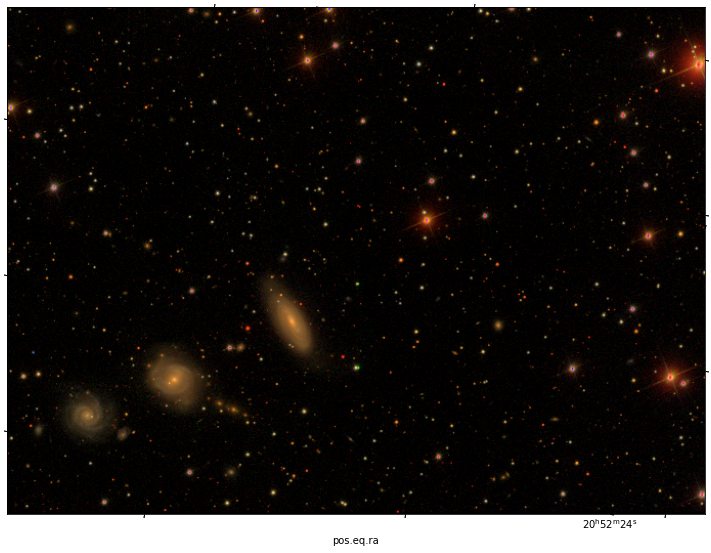

In [3]:
rgb = make_lupton_rgb(i, r, g, Q=10, stretch=0.5, filename="ngc6976.jpeg")
plt.subplot(projection=wcs1) 

plt.imshow(rgb, origin='lower')

fig = plt.gcf()
fig.set_size_inches(12.5, 12.5)